<a href="https://colab.research.google.com/github/johyunkang/MLwithPythonCookbook/blob/main/11_%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 11 모델평가

## 11.1 교차검증 모델 만들기

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드
digits = datasets.load_digits()

# 특성 행렬을 만들기
features = digits.data
print('features shape:', features.shape)
print('features sample:', features[:3])

# 타깃벡터
target = digits.target
print('\n\ntarget shape:', target.shape)
print('target sample:', target[:3])

scaler = StandardScaler()
lr = LogisticRegression()

# 표준화 후 로지스틱회귀 파이프라인 생성
pipeline = make_pipeline(scaler, lr)

# K-폴드 교차검증
kf = KFold(n_splits=10, shuffle=True, random_state=1)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

cv_result = cross_val_score(pipeline, # 파이프라인
                            features, # 특성행렬
                            target,   # 타깃
                            cv = kf,  # 교차검증 기법
                            scoring='accuracy', # 평가지표
                            n_jobs = -1 # 모든 CPU 사용
                            )

# 평균 계산
print('\n\n평균 계산(KFold):', cv_result.mean())
print(cv_result)

cv_result = cross_val_score(pipeline, # 파이프라인
                            features, # 특성행렬
                            target,   # 타깃
                            cv = skf,  # 교차검증 기법
                            scoring='accuracy', # 평가지표
                            n_jobs = -1 # 모든 CPU 사용
                            )

# 평균 계산
print('\n\n평균 계산(StratifiedKFold):', cv_result.mean())
print(cv_result)

features shape: (1797, 64)
features sample: [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]


target shape: (1797,)
target sample: [0 1 2]


평균 계산(KFold): 0.9693916821849783
[0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556

## 11.2 기본 회귀 모델 만들기 

과제 : 다른 모델과 비교하기 위해 기본 회귀 모델을 만들고 싶습니다

해결 : `DummyRegressor`를 사용하여 기본 모델로 사용할 간단한 더미 모델을 만듭니다.

In [2]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시
# warnings.filterwarnings(action='default') # 경고 나오게 

boston = load_boston()

features, target = boston.data, boston.target
print('features shape:', features.shape)
print('features sample:', features[:3])
print('\n\ntarget shape:', target.shape)
print('target sample:', target[:3])

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

# 더미 회귀모델을 만듭니다.
dummy = DummyRegressor(strategy='mean')

# 더미 회귀모델 훈련
dummy.fit(x_train, y_train)

# R2 점수 계산
r2 = dummy.score(x_test, y_test)
print('R2 score:', r2)

features shape: (506, 13)
features sample: [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


target shape: (506,)
target sample: [24.  21.6 34.7]
R2 score: -0.001119359203955339


다른 모델을 훈련하고 평가하여 성능점수 비교

In [3]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(x_train, y_train)
# R2 계산
r2_ols = ols.score(x_test, y_test)
print('r2 score:', r2_ols)

r2 score: 0.635463843320211


## 11.4 이진 분류기의 예측 평가하기 

과제 : 훈련된 분류 모델의 품질을 평가하고 싶습니다.

해결 : 사이킷런의 `cross_val_score` 함수를 사용하여 교차검증을 수행할 때 `scoring` 매개 변수에 선능지표 중 하나를 선택 가능

- 정밀도(precision), 재현율(recall), F1

- 정확도 $= \dfrac {TP + TN} {TP+TN+FP+FN}$

- FP : Type1 에러. 양성 클래스로 예측한 것 중에서 실제는 음성 클래스인 샘플 개수

- FN : Type2 에러. 음성 클래스로 예측한 것 중에서 실제 양성 클래스인 샘플 개수

`make_classification` 파라미터 설명
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터 생성
x, y = make_classification(n_samples=1000, n_features=3, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=1)

print('x shape:', x.shape)
print('y shape:', y.shape)
print('x sample:', x[:3])
print('y sample:', y[:3])

logit = LogisticRegression()
accu = cross_val_score(logit, x, y, scoring='accuracy')
print('\n정확도(accuracy):', accu)

x shape: (1000, 3)
y shape: (1000,)
x sample: [[-0.80141251  2.42988093  0.69276514]
 [-1.44629062 -0.62026815  1.56596609]
 [ 0.970616    0.88966077  1.94673411]]
y sample: [1 1 0]

정확도(accuracy): [0.87 0.88 0.85 0.93 0.9 ]


정밀도 : 양성으로 예측한 샘플 중 진짜 양성 클래스의 비율

정밀도 $= \dfrac {TP} {TP + FP}$

In [5]:
prec = cross_val_score(logit, x, y, scoring='precision')
print('정밀도(precision):', prec)

정밀도(precision): [0.83035714 0.86538462 0.8125     0.9673913  0.86238532]


재현율 : 진짜 양성 샘플 중에서 양성으로 예측한 비율

재현율 $= \dfrac {TP} {TP+FN}$

In [6]:
recall = cross_val_score(logit, x, y, scoring='recall')
print('재현율(recall):', recall)

재현율(recall): [0.93       0.9        0.91       0.89       0.94949495]


정밀도와 재현율은 서로 균형을 맞춰야 함

이를 좀 더 직관적으로 이해하기 위해 F1 점수가 만들어 짐

F1은 정밀도와 재현율의 조화평균(harmonic mean)임

$F1 = 2 \times \dfrac {precision \times recall} {precision + recall}$

In [7]:
f1 = cross_val_score(logit, x, y, scoring='f1')
print('F1 score:', f1)

F1 score: [0.87735849 0.88235294 0.85849057 0.92708333 0.90384615]


`cross_validate` (sklearn ver 0.19 추가) 는 `cross_val_score`와 비슷하지만 여러 개의 평가 지표를 추가할 수 있음

In [8]:
from sklearn.model_selection import cross_validate

rt_cv = cross_validate(logit, x, y, scoring=['accuracy', 'f1'])
print('cross_validate 결과\n', rt_cv)
print('\ncross_validate 결과 type:', type(rt_cv))
print('\ndict keys 추출:', rt_cv.keys())
print('\nkey fit_time 만 추출:', rt_cv['fit_time'])

cross_validate 결과
 {'fit_time': array([0.00427938, 0.00621891, 0.0057013 , 0.00512934, 0.00398517]), 'score_time': array([0.00140929, 0.00177073, 0.00262308, 0.00157046, 0.0011785 ]), 'test_accuracy': array([0.87, 0.88, 0.85, 0.93, 0.9 ]), 'test_f1': array([0.87735849, 0.88235294, 0.85849057, 0.92708333, 0.90384615])}

cross_validate 결과 type: <class 'dict'>

dict keys 추출: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1'])

key fit_time 만 추출: [0.00427938 0.00621891 0.0057013  0.00512934 0.00398517]


## 11.5 이진 분류기 임곗값 평가하기 (ROC 커브, AUROC)

과제 : 이진 분류기를 여러 가지 확률 임곗값으로 평가하고 싶습니다.

해결 : ROC (receving operating chracteristic) 곡선을 이용하여 품질 평가

x shape: (10000, 10)
y shape: (10000,)
x sample: [[ 0.95113083  0.10088996  0.59922172 -0.57727406 -1.27124436  1.57065196
  -0.01500449  1.31616396 -1.00534424 -1.87957819]
 [ 0.71901417  0.98935259 -1.58166774 -0.86235827 -0.99428269  1.83633119
   1.14487266  1.25305604  0.87268006  0.81333374]
 [ 0.53683917  1.0822293  -1.27721296  1.35144769  1.35246266 -0.79009656
   1.30122471 -0.15950734  0.0940172  -1.54091607]]
y sample: [1 1 0]


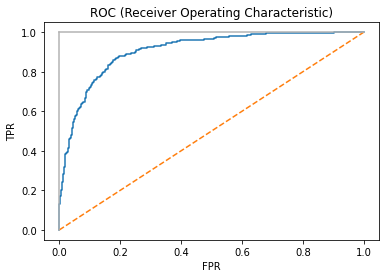

In [9]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=10_000, n_features=10, n_classes=2,
                           n_informative=3, random_state=3)
print('x shape:', x.shape)
print('y shape:', y.shape)
print('x sample:', x[:3])
print('y sample:', y[:3])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
logit = LogisticRegression()

logit.fit(x_train, y_train)

# 예측확률 계산
y_proba = logit.predict_proba(x_test)[:, 1]

# 진짜 양성 비율과 거짓 양성 비율을 계산
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)

# ROC 곡선
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c="0.7") # c=0.7 : gray color 수직선
plt.plot([1, 1], c='0.7')         # c=0.7 : gray color 수평선
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [10]:
print('FPR shape:', false_positive_rate.shape)
print('FPR value:', false_positive_rate[:3])
print('\nTPR shape:', true_positive_rate.shape)
print('TPR value:', true_positive_rate[:3])


sample = logit.predict_proba(x_test)
print('sample shape:', sample.shape)
print('sample val:', sample[:3])
print('y_proba shape:', y_proba.shape)
print('y_proba sample:', y_proba[:3])

FPR shape: (236,)
FPR value: [0. 0. 0.]

TPR shape: (236,)
TPR value: [0.         0.00204082 0.13265306]
sample shape: (1000, 2)
sample val: [[0.86891533 0.13108467]
 [0.46315541 0.53684459]
 [0.03395355 0.96604645]]
y_proba shape: (1000,)
y_proba sample: [0.13108467 0.53684459 0.96604645]


In [12]:
# classes_ 를 이용하여 클래스를 확인
logit.classes_

array([0, 1])

$진짜 양성 비율(TPR) = \dfrac{진짜양성} {진짜양성 + 거짓음성} = \dfrac {TP} {TP + FN} = RECALL$

$거짓 양성 비율 (FPR) = \dfrac {거짓양성} {거짓양성 + 진짜음성} = \dfrac {FP} {FP + TN}$


ROC 곡선은 확률 임곗값마다 TPR 과 FPR을 나타냅니다.

예를 들어 해결에서 임곗값이 0.5일 때 TPR은 0.81, FPR은 0.15 입니다.

In [14]:
print('임곗값:', threshold[116])
print('진짜양성비율(TPR) : ', true_positive_rate[116])
print('거짓양성비율 (FPR) :', false_positive_rate[116])

임곗값: 0.5331715230155316
진짜양성비율(TPR) :  0.810204081632653
거짓양성비율 (FPR) : 0.14901960784313725


임곗값을 **80%로 증가**시키면 (즉, 샘플을 양성으로 예측하기 위해 모델이 확신하는 정도를 증가시키면) TPR과 FPR이 크게 **감소**합니다.

In [15]:
idx = 45
print('임곗값:', threshold[idx])
print('TPR:', true_positive_rate[idx])
print('FPR:', false_positive_rate[idx])

임곗값: 0.818913387665929
TPR: 0.5448979591836735
FPR: 0.047058823529411764


In [28]:
import numpy as np
print(type(threshold[0]))
print('len:', len(threshold))
print(236 - (236 * 0.8))
# print(np.round(threshold * 100, 4))

<class 'numpy.float64'>
len: 236
47.19999999999999


`roc_auc_score` 함수를 이용하여 AUCROC를 계산 가능

AUCROC가 1에 가까울수록 더 좋은 모델임

In [29]:
# ROC 곡선 아래 면적을 계산
print(roc_auc_score(y_test, y_proba))

0.9073389355742297


TPR은 재현율(recall)의 다른 이름

ROC 곡선 외에 정밀도_재현율_곡선을 그려 모델을 평가할 수도 있음

`precision_recall_curve` 함수를 사용해 임계점 마다 정밀도와 재현율을 계산하여 정밀도 재현율 곡선을 그림

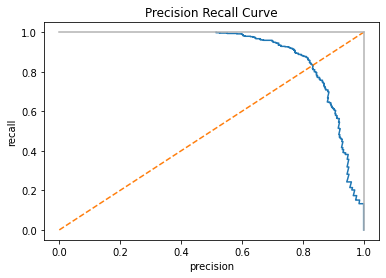

In [31]:
from sklearn.metrics import precision_recall_curve

# TPR 과 FPR을 계산
precision, recall, threshold = precision_recall_curve(y_test, y_proba)

plt.title('Precision Recall Curve')
plt.plot(precision, recall)
plt.plot([0, 1], ls='--')
plt.plot([1,1], c='0.7')
plt.plot([1,1], [1,0], c='0.7')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

위의 **정밀도 재현율 곡선**에서는 오른쪽 맨 위에 가까울수록 더 좋은 모델임.

이 곡선의 아래 면적을 **평균 정밀도**라고 부르며 `average_precision_score` 함수를 사용해 계산할 수 있음

In [33]:
from sklearn.metrics import average_precision_score

# 평균 정밀도를 계산
average_precision_score(y_test, y_proba)

0.8984128719848977

아래와 같이 `cross_validate` 함수의 `scoring`에 ROCAUC와 평균정밀도를 평가 지표로 지정 가능

In [37]:
rt_cv = cross_validate(logit, x, y, scoring=['roc_auc', 'average_precision'])
print('roc_auc:', rt_cv['test_roc_auc'])
print('average_precision:', rt_cv['test_average_precision'])
print('전체 결과\n', rt_cv)

roc_auc: [0.9007689 0.918251  0.90882   0.915359  0.90261  ]
average_precision: [0.90028629 0.90967443 0.90296471 0.91135611 0.88797021]
전체 결과
 {'fit_time': array([0.04094505, 0.0375948 , 0.03774071, 0.03104019, 0.02999353]), 'score_time': array([0.01091313, 0.01089859, 0.00426745, 0.00391293, 0.00388503]), 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]), 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}


## 11.6 다중클래스 분류기 예측 평가하기

In [ ]:
# p.298